In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
#create dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [7]:
df['target']=iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [8]:
#adding flower names
df['flower_names']=df.target.apply(lambda x: iris.target_names[x])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa

In [9]:
df0 = df[df.target ==0]
df1 = df[df.target ==1]
df2 = df[df.target ==2]

In [10]:
df2.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target flower_names  
100       2    virginica  
101       2    virginica  
102       2    virginica  
103       2    virginica  
104       2    virginica

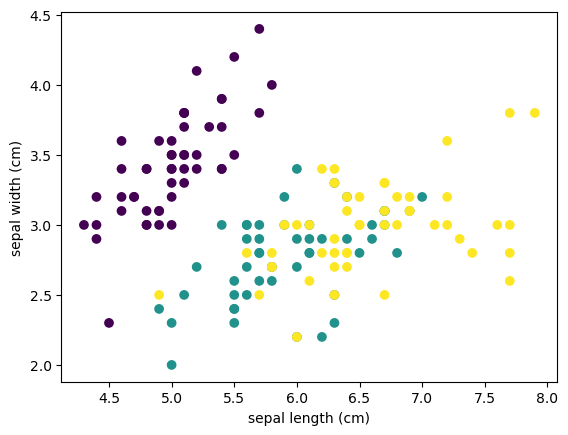

In [15]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

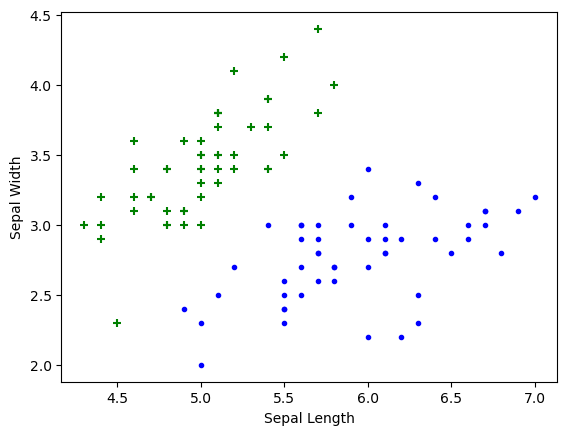

In [16]:
#visualization of species with their features
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green',
            marker ='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue',
            marker ='.')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()

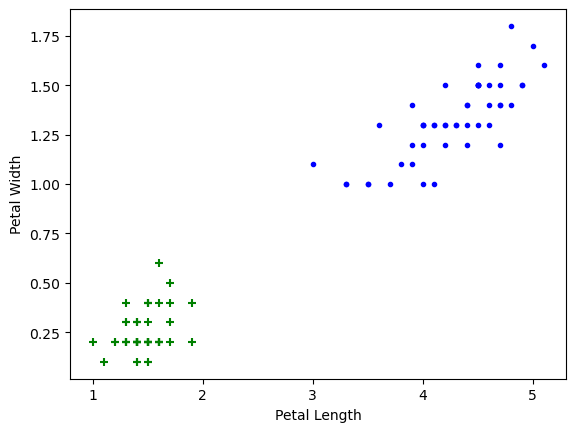

In [17]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green',
            marker ='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue',
            marker ='.')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

# Building the SVM model

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=df.drop(['target','flower_names'],axis='columns')
y=df.target

In [20]:
x.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [31]:
#spliting data
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [27]:
#SVM
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [28]:
y_pred = model.predict(x_test)
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [32]:
model.score(x_test,y_test)

0.9777777777777777

In [34]:
model.predict([[4.7,3.2,1.3,0.2]])

C:\Users\AA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

# Tuning the parameters:

1. Regularization(C):
It decides how much you want to penalize the misclassification data points. 
Low C: Simplicity
High C: Prioritize few mistake

In [41]:
model_c=SVC(C=10)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.9777777777777777

In [42]:
model_c=SVC(C=100)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.9777777777777777

2. Kernel :

linear, rbf, polynomial, sigmoid

rbf and polynomial are used for non linear,

default : rbf

In [47]:
model_k_linear = SVC(kernel='linear')
model_k_linear.fit(x_train,y_train)
model.score(x_test,y_test)

0.9777777777777777

In [50]:
model_k_poly = SVC(kernel='poly', C=10, gamma = 10)
model_k_poly.fit(x_train,y_train)
model.score(x_test,y_test)

0.9777777777777777

In [51]:
model_k_sigmoid = SVC(kernel = 'sigmoid')
model_k_sigmoid.fit(x_train, y_train)
model_k_sigmoid.score(x_test,y_test)

0.24444444444444444

3. Gamma:
It is the coefficient for kernel parameters

High gamma : high complexity of model

Low gamma : low complexity

In [55]:
model_g = SVC(gamma =1)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.9777777777777777

In [56]:
model_g = SVC(gamma =10)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.9333333333333333